In [9]:
# 활성화 함수(Activation Function) : 뉴런이 입력받아 연산결과를 다음 뉴런으로 전달할 때, 임계점을 넘을 경우만 신호를 전달하는 체계 
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Step Function')

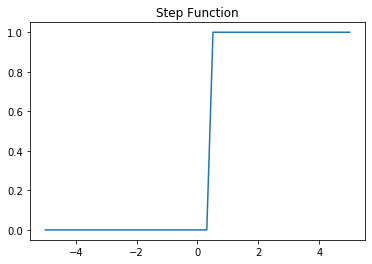

In [10]:
# Step 함수 : 가장 단순한 형태로 분기점을 넘으면 값이 증가 분기점에 도달하지 않으면 0(출력하지 않음)
def step_function(x, threshold=0):
    # x:압력, threshold:분기점
    return np.where(x<=threshold, 0, 1)

# 시각화를 위한 선형 공간 생성
x = np.linspace(-5, 5)
y = step_function(x, threshold=0.5)

plt.plot(x, y)
plt.title("Step Function")

Text(0.5, 1.0, 'Sigmoid Function')

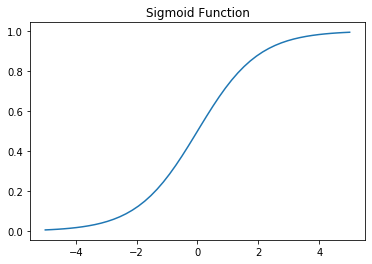

In [11]:
# Sigmoid 함수 : Step함수보다 부드러운 형태로 좀 더 실제와 같다. 
# 단순하지만 전통적으로 널리 사용되운 함수로 로지스틱 함수이다. (0~1부드럽게 변화)
# 신경망이 깊어지면 Gradient Vanishing 현상이 발생
def sigmoid_function(x):
    # x:입력값
    return 1 / (1+np.exp(-x))

sigmoid_y = sigmoid_function(x)
plt.plot(x, sigmoid_y)
plt.title("Sigmoid Function")

Text(0.5, 1.0, 'Hyperbolic Tangent')

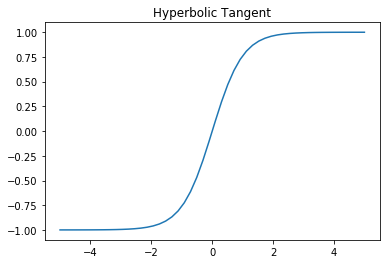

In [12]:
# tanh 함수(Hyperbolic Tangent) : sigmoid 함수와 비슷하지만 활성화 정도에 차이가 있음
def tanh_function(x):
    return np.tanh(x)

tanh_y = tanh_function(x)
plt.plot(x, tanh_y)
plt.title("Hyperbolic Tangent")

Text(0.5, 1.0, 'Relu Function')

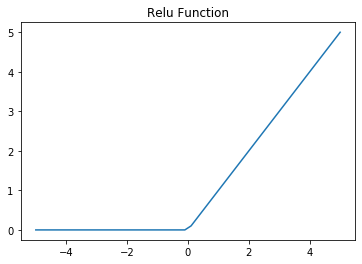

In [13]:
# Relu 함수(Rectified Linear Unit) : x>0 범위 내에서 우상향 선형 곡선을 그린다. 최근 딥러닝에서 많이 활용
def relu_function(x):
    return np.where(x <= 0, 0, x)

relu_y = relu_function(x)
plt.plot(x, relu_y)
plt.title("Relu Function")

Text(0.5, 1.0, 'Leaky Relu Function')

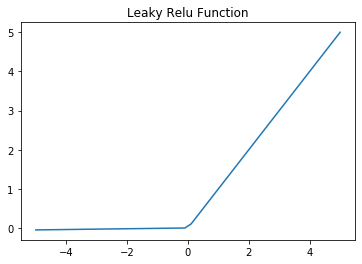

In [14]:
# Leaky Relu : dying Relu 현상의 해소를 위해 음수 영역에 약간의 기울기를 만들어줌 
# dying Relu 현상 : Relu함수의 경우 입력이 0보다 작을 경우 출력이 0 -> 전달되는 신호의 유실, 학습진행 불가 
def leaky_relu_function(x):
    return np.where(x <= 0, x * 0.01, x)

leaky_y = leaky_relu_function(x)
plt.plot(x, leaky_y)
plt.title("Leaky Relu Function")

In [15]:
# Softmax : 분류 문제를 다룰 때 적합 
def softmax_function(x):
    return np.exp(x) / np.sum(np.exp(x))

source = [1, 2, 3]
result = softmax_function(source)
print("SoftMax:", result)
print("Sum:", sum(result))

SoftMax: [0.09003057 0.24472847 0.66524096]
Sum: 1.0


출력:
 [[0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


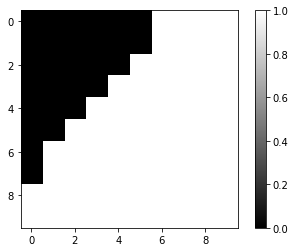

In [22]:
# 신경망을 활용한 XOR 문제 해결
# 좌표계 설정
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)
Z = np.zeros((10, 10)) # 격자
# 가중치 
w_x = 2.5
w_y = 3.0
# 편향
bias = 2.0

# grid맵에 뉴런의 연산을 출력 
for i in range(10):
    for j in range(10):
        # 입력과 가중치 곱 + 편향 
        u = X[i] * w_x + Y[j] * w_y + bias
        # 그리드 맵에 출력값 저장
        #y = sigmoid_function(u)
        y = step_function(u)
        
        Z[i][j] = y
print("출력:\n", Z)

# 그래프로 출력
plt.imshow(Z, # 이미지 출력
           "gray") # 컬러 맵
plt.colorbar()
plt.show()
# 검은 색 영역은 출력값이 0 -> 뉴런이 흥분하지 않은 상태, 희색 영역은 출력값이 1 -> 뉴런이 흥분한 상태

In [32]:
# 신경망을 중첩하면 어떤 분류든 가능하다 
X = np.arange(-1.0, 1.0, 0.2)
Y = np.arange(-1.0, 1.0, 0.2)
# 출력 저장소
Z = np.zeros((10, 10))
w_i_h = np.array([
    [2.0, 2.0],
    [2.0, 2.0]
])
w_h_o = np.array([
    [1.0], [-1.0]
])
# 은닉층 편향 
b_i_h = np.array([3.0, -3.0])
# 출력층 편향
b_h_o = np.array([0.1])

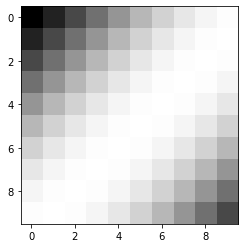

In [33]:
# 은닉층
def hidden_layer(x, w, b):
    u = np.dot(x, w) + b
    return sigmoid_function(u)

def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u

# 그리드맵의 각 그리드 별 신경망 연산 수행
for i in range(10):
    for j in range(10):
        # 순전파
        inp = np.array([X[i], Y[j]]) # 입력층
        hid = hidden_layer(inp, w_i_h, b_i_h) # 은닉층
        out = output_layer(hid, w_h_o, b_h_o)
        
        # 그리드 맵에 신경망 출력값 저장
        Z[i][j] = out[0]
# 출력
plt.imshow(Z, "gray")